In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
file = open('feedback.csv',  encoding='utf-8')
columns = file.readline()[:-1].split(',')

In [3]:
columns

['rating', 'product_id', 'name', 'date', 'feedback']

In [4]:
for line in file:
    tmp = line.split(',')
    
    print(','.join(tmp[4:]))
    print(tmp)
    break

"6 входов, предохранитель","искрит при включении любого устройства в любой сетевой вход","Данный сетевой фильтр начал искрить после недели эксплуатации. Защитить компьютер от перепада напряжения, я думаю, он вряд ли сможет."

['1', '8342', 'Александр', '2017-04-12', '"6 входов', ' предохранитель"', '"искрит при включении любого устройства в любой сетевой вход"', '"Данный сетевой фильтр начал искрить после недели эксплуатации. Защитить компьютер от перепада напряжения', ' я думаю', ' он вряд ли сможет."\n']


### В некоторых местах в данных три отзыва, а не один (минусы, плюсы, и сам фидбек)

In [5]:
data = pd.read_csv('feedback.csv', names=['rating', 'product_id', 'name', 'date', 'pos', 'neg', 'feedback'])

In [6]:
data = data.drop(0)

In [7]:
data

,rating,product_id,name,date,pos,neg,feedback
1,1,8342,Александр,2017-04-12,"6 входов, предохранитель",искрит при включении любого устройства в любой...,Данный сетевой фильтр начал искрить после неде...
2,5,8342,Елена,2015-08-04,Я являюсь пользователем Пилотов уже больше 10 ...,NaN,NaN
3,5,5311,Леонид,2017-07-16,хорошо мелет,"маркий, остаются следы",Использую 1 месяц. Пока проблем нет.
4,4,5311,Сергей,2017-06-28,Компактная,Не нашел,"Работает на ура. В инструкции четко написано, ..."
5,5,5311,Ольга,2017-01-21,Цена и качество,Нет,В использовании 2 месяца перемалывает быстро и...
...,...,...,...,...,...,...,...
18337,5,50037359,Антон,2017-02-22,"Удобная, качественная","Не обнаружил, если только цена","Доска была куплена в январе месяце, так как же..."
18338,4,50037359,Мария,2016-04-10,доска большого размера - не для маленьких квар...,NaN,NaN
18339,5,50037359,Екатерина,2016-04-09,"Пользуюсь уже 2 года, ничего не скрипит, по по...",NaN,NaN
18340,1,50037359,Дормидонт,2015-12-10,за эти деньги можно купить как минимум две оте...,NaN,NaN


In [8]:
def y(x):
    if x['feedback'].isnan():
        return x['pos'] 
    else:
        return x['feedback']

In [9]:
sum(data['feedback'].isnull())

17254

In [10]:
data['feedback'][data['feedback'].isnull()] = data['pos'].loc[data[data['feedback'].isnull()].index]

In [11]:
data.drop(['pos', 'neg'], axis=1, inplace=True)
data

,rating,product_id,name,date,feedback
1,1,8342,Александр,2017-04-12,Данный сетевой фильтр начал искрить после неде...
2,5,8342,Елена,2015-08-04,Я являюсь пользователем Пилотов уже больше 10 ...
3,5,5311,Леонид,2017-07-16,Использую 1 месяц. Пока проблем нет.
4,4,5311,Сергей,2017-06-28,"Работает на ура. В инструкции четко написано, ..."
5,5,5311,Ольга,2017-01-21,В использовании 2 месяца перемалывает быстро и...
...,...,...,...,...,...
18337,5,50037359,Антон,2017-02-22,"Доска была куплена в январе месяце, так как же..."
18338,4,50037359,Мария,2016-04-10,доска большого размера - не для маленьких квар...
18339,5,50037359,Екатерина,2016-04-09,"Пользуюсь уже 2 года, ничего не скрипит, по по..."
18340,1,50037359,Дормидонт,2015-12-10,за эти деньги можно купить как минимум две оте...


## Keras example

## Text prep

В примере керас используется индексация по частоте встречаемости слова (самое частое слово 1, самое редкое n, где n размер словаря). В данной задаче используется аналогичная индесация слов

In [12]:
data

,rating,product_id,name,date,feedback
1,1,8342,Александр,2017-04-12,Данный сетевой фильтр начал искрить после неде...
2,5,8342,Елена,2015-08-04,Я являюсь пользователем Пилотов уже больше 10 ...
3,5,5311,Леонид,2017-07-16,Использую 1 месяц. Пока проблем нет.
4,4,5311,Сергей,2017-06-28,"Работает на ура. В инструкции четко написано, ..."
5,5,5311,Ольга,2017-01-21,В использовании 2 месяца перемалывает быстро и...
...,...,...,...,...,...
18337,5,50037359,Антон,2017-02-22,"Доска была куплена в январе месяце, так как же..."
18338,4,50037359,Мария,2016-04-10,доска большого размера - не для маленьких квар...
18339,5,50037359,Екатерина,2016-04-09,"Пользуюсь уже 2 года, ничего не скрипит, по по..."
18340,1,50037359,Дормидонт,2015-12-10,за эти деньги можно купить как минимум две оте...


In [13]:
div = len(data) * 3 // 4
X_train, X_test, y_train, y_test = data['feedback'][:div] , data['feedback'][div:], data['rating'][:div], data['rating'][div:]   

In [14]:
X_train

1        Данный сетевой фильтр начал искрить после неде...
2        Я являюсь пользователем Пилотов уже больше 10 ...
3                    Использую 1 месяц. Пока  проблем нет.
4        Работает на ура. В инструкции четко написано, ...
5        В использовании 2 месяца перемалывает быстро и...
                               ...                        
13751    Купил,хожу по городу и радуюсь! Не знаю, как у...
13752    +Всё нормально. Звук на твёрдую четвёрку. Ради...
13753          Очень плохое качество радио приема - шипит.
13754    Сначала горела нокией эксперсс мьюзик, но сест...
13755    хожу с этим телефошкой с июля 2009 года.фото х...
Name: feedback, Length: 13755, dtype: object

In [15]:
import re
import pymorphy2
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()

def text_prep(text):
    text = text.lower()
#     print(text)
    text = re.sub('[!?.,()-:+]', ' ', text)
    text = re.sub('"', '', text)
    return [morph.parse(i)[0].normal_form for i in text.split() if i not in stopwords.words('russian')]

In [16]:
X_train = X_train.apply(text_prep)
X_test = X_test.apply(text_prep)

In [17]:
X_train.iloc[0]

['данный',
 'сетевой',
 'фильтр',
 'начать',
 'искрить',
 'неделя',
 'эксплуатация',
 'защитить',
 'компьютер',
 'перепад',
 'напряжение',
 'думать',
 'вряд',
 'смочь']

In [18]:
res = []
for i in range(len(X_train)):
    try:
        res += X_train.iloc[i]
    except:
        print(i)
        break

In [19]:
dictionary = pd.DataFrame(pd.Series(res))

In [20]:
dictionary[1] = 1

In [21]:
dictionary = dictionary.groupby(0).count().sort_values(by=1, ascending=False)

In [22]:
dictionary = dictionary.reset_index()

In [23]:
res = []
for i in range(len(X_test)):
    try:
        res += X_test.iloc[i]
    except:
        print(i)
        break
test_dict = pd.DataFrame(pd.Series(res))
test_dict[1] = 1
test_dict = test_dict.groupby(0).count().sort_values(by=1, ascending=False)


In [24]:
test_dict = test_dict.reset_index()

In [25]:
test_dict.index += 1
dictionary.index += 1

In [26]:
dictionary = dictionary.reset_index().set_index(0)
test_dict = test_dict.reset_index().set_index(0)

In [27]:
dictionary

,index,1
0,,
очень,1,6979
купить,2,4206
это,3,3953
год,4,3759
хороший,5,2904
...,...,...
многокомнатный,23885,1
многомесячный,23886,1
многоооооо,23887,1


In [28]:
X_train

1        [данный, сетевой, фильтр, начать, искрить, нед...
2        [являться, пользователь, пилот, год, какой, ли...
3                    [использовать, месяц, пока, проблема]
4        [работать, ура, инструкция, чётко, написать, т...
5        [использование, месяц, перемалывать, быстро, к...
                               ...                        
13751    [купить, ходить, город, радоваться, знать, кто...
13752    [всё, нормально, звук, твёрдый, четвёрка, ради...
13753      [очень, плохой, качество, радио, приём, шипеть]
13754    [сначала, гореть, нокия, эксперсс, мьюзик, сес...
13755    [ходить, это, телефошка, июль, год, фото, хоро...
Name: feedback, Length: 13755, dtype: object

### Слова из тестовой выборки отсутствующие в обучающей.
Такие слова встречаются редко, всего 4185 раз за всю выборку (142067 слово), а максимум встречаемости среди таких слов 6. Все они при индексации будут помечены len(dictionary) + 1

In [29]:
test_dict.loc[list(set(test_dict.index).difference(set(dictionary.index)))].sort_values(by=1)

,index,1
0,,
поклейка,12460,1
энный,7943,1
not,9291,1
привeзлить,12918,1
повседневно,13835,1
...,...,...
нфс,3369,5
видеовыход,3399,5
магия,3689,5


In [30]:
sum(test_dict.loc[list(set(test_dict.index).difference(set(dictionary.index)))][1])

4185

In [31]:
dictionary

,index,1
0,,
очень,1,6979
купить,2,4206
это,3,3953
год,4,3759
хороший,5,2904
...,...,...
многокомнатный,23885,1
многомесячный,23886,1
многоооооо,23887,1


In [32]:
def change_words(t):
    text = t.copy()
    for i in range(len(text)):
        
#         print(text[i])
#         text[i] = dictionary.loc[text[i]]['index']
        try:
            text[i] = dictionary.loc[text[i]]['index']
        except:
            text[i] = len(dictionary) + 1
    return text

In [33]:
X_train_indeces = X_train.apply(change_words)

In [34]:
X_test_indeces = X_test.apply(change_words)

<AxesSubplot:>

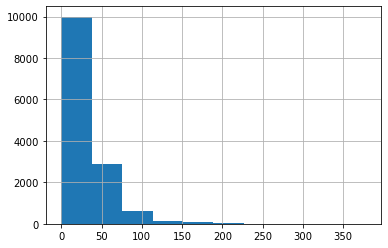

In [35]:
X_train.apply(len).hist()

In [36]:
y_train.unique()

array(['1', '5', '4', '4.3', '4.7', '2', '3', '3.7', '2.3', '2.7', '3.3',
       '1.3', '1.7'], dtype=object)

# TODO: change y to matrix and run the model

In [37]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 25000  # Only consider the top 20k words
maxlen = 150  # Only consider the first 150 words of each review

"""
## Build the model
"""

# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a regression
outputs = layers.Dense(1, activation="relu")(x)
model = keras.Model(inputs, outputs)
model.summary()

"""
## Load the IMDB movie review sentiment data
"""


print(len(X_train), "Training sequences")
print(len(X_test), "Validation sequences")
# Use pad_sequence to standardize sequence length:
# this will truncate sequences longer than 200 words and zero-pad sequences shorter than 200 words.
X_train = keras.preprocessing.sequence.pad_sequences(X_train_indeces, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test_indeces, maxlen=maxlen)

"""
## Train and evaluate the model
"""

model.compile(optimizer="adam", loss="mse", metrics=["mse", 'mae'])
model.fit(X_train, y_train.apply(float), batch_size=32, epochs=2, validation_data=(X_test, y_test.apply(float)))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         3200000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,397,761
Trainable params: 3,397,761
Non-trainable params: 0
_________________________________________________________________
13755 Training sequences
4586 Validation sequences
Epoch 1/2
430/430 [==============================] - 148s 308ms/st

## Fasttext

In [38]:
def create_ngram_set(input_list, ngram_value=2):
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):

    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)

    return new_sequences

In [39]:
ngram_range = 3
max_features = 20000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 5

In [40]:
ngram_set = set()
for input_list in X_train_indeces:
    for i in range(2, ngram_range + 1):
        set_of_ngram = create_ngram_set(input_list, ngram_value=i)
        ngram_set.update(set_of_ngram)

In [41]:
start_index = max_features + 1
token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
indice_token = {token_indice[k]: k for k in token_indice}

In [42]:
max_features = np.max(list(indice_token.keys())) + 1

In [43]:
X_train_indeces = add_ngram(X_train_indeces, token_indice, ngram_range)
X_test_indeces = add_ngram(X_test_indeces, token_indice, ngram_range)

In [44]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train_indeces, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test_indeces, maxlen=maxlen)

In [45]:
y_train = y_train.apply(float)
y_test = y_test.apply(float)

In [46]:
model = keras.Sequential()

model.add(layers.Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))


model.add(layers.GlobalAveragePooling1D())


model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer="adam", loss="mse", metrics=["mse", 'mae'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Epoch 1/5
430/430 [==============================] - 212s 492ms/step - loss: 10.8757 - mse: 10.8757 - mae: 2.9066 - val_loss: 1.8003 - val_mse: 1.8003 - val_mae: 0.9379
Epoch 2/5
430/430 [==============================] - 211s 492ms/step - loss: 2.0561 - mse: 2.0561 - mae: 1.1232 - val_loss: 1.7066 - val_mse: 1.7066 - val_mae: 0.9212
Epoch 3/5
430/430 [==============================] - 215s 499ms/step - loss: 1.5955 - mse: 1.5955 - mae: 0.9857 - val_loss: 1.6658 - val_mse: 1.6658 - val_mae: 0.9047
Epoch 4/5
430/430 [==============================] - 213s 495ms/step - loss: 1.3463 - mse: 1.3463 - mae: 0.8976 - val_loss: 1.6622 - val_mse: 1.6622 - val_mae: 0.9103
Epoch 5/5
430/430 [==============================] - 211s 492ms/step - loss: 1.0827 - mse: 1.0827 - mae: 0.7843 - val_loss: 1.5634 - val_mse: 1.5634 - val_mae: 0.9173


# Model with pretrained Word2Vec